
# Project: Investigate (TMDB Tthe Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
* The movie database (TMDB )from 1960 to 2015 contains a large database of up to thousands In this project, I analyze a dataset (TMDB The Movie Dataset) and investigate it to reach to the most popular movies and the perfect month to released movie and also you maybe can get the high profit
* We will analyze this data in order to get some answers such as what is the most profitable month and What are the most popular genres of films according to vote average and  What are the most top 5 movies popular and What are the top profits and genres movies between 1960 to 2015  


* in this section we import all the packages we will use it and we load the data set

In [1]:
#import all the packages we will need it 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


In [2]:
#load the data set 
df=pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

* In this section of the report, I will provide information about the data set that we have.in two stages
#### General Properties of our data
* we will show a sample of the data and then we will know how many rows and columns there are and know the datatype of columns 
* We want to know if there is non value
* view how many value is unique in each column
* We need to know descriptive statistical information about the data set to know the nature of the data
* we will know the movie if exist budget or revenue is zero
#### clean data 
* we will delete the duplicates values and non value
* we will drop columns we dont use it 
* we will delete the movie budget or revenue is zero
* we will convert datatype of release_date to datetime
* we will calculate the profit from budget and revenue



### General Properties of our data

### 1- we will show a sample of the data and then we will know how many rows and columns there are and know the datatype of columns 

In [3]:
# view sample of the data set (2 rows)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# know the shape of dataset (rows and columns)
df.shape

(10866, 21)

* we see the dataset have 21 columns and 10866 rows 

In [5]:
# view  the datatype for each attribute in columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

* we can see there is some value is missing in this columns such as cast , homepage , director , tagline , keywords , production_companies,  genres ,overview 
* we can see the datatype of release data is int convert it to datatime

### 2- We want to know if there is non value

In [6]:
# view that null-value of each columns in dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* we count the null-value in our dataset and the result is above

### 3- view how many value is unique in each column

In [7]:
#view how many value is unique in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### 4- We need to know descriptive statistical information about the data set to know the nature of the data

In [8]:
# view describtive statistic information about dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* We can note that the release year is from 1996 to 2015 ,in addition we can see the mean average the budget of movies around 1.5 milion , the maximum budget  4.25 milion dollar 

### 5- we will delete the movie if budget or revenue is zero

In [9]:
#view the data of revenue equal zero
df.query('revenue==0').count()

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [10]:
#view the data of budget equal zero
df.query('budget==0').count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64


### Data Cleaning
In this stage we clean and edit some of the data that was explored in the previous stage


In [11]:
# we drop the duplicate values from our data 
df.drop_duplicates(inplace=True)

In [12]:
# we check if any values in our data have duplicate value 
df.duplicated().sum()

0

In [13]:
# we will drop any non value
df.dropna()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,4.160985e+07,4.872780e+08
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,"A psychotic murderer, institutionalized since ...",91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,"At a 1962 College, Dean Vernon Wormer is deter...",109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Martin Scorsese's rockumentary intertwines foo...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06


In [14]:
# we will drop the columns are not use in analysis
df.drop(['imdb_id','homepage','overview','tagline','keywords'],axis=1,inplace=True)
#to check if it applied
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [15]:
# we convert the release data from int to datatime
df['release_date']=pd.to_datetime(df['release_date'])
#to check if it applied
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

In [16]:
# to clean the data of revenue and budget equal zero
df=df[df.budget !=0]
df.query('budget==0').count()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
df=df[df.revenue !=0]
df.query('revenue==0').count()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [18]:
#turn string into list
df['genres'] = df['genres'].str.split('|')


In [19]:
df_edit = df.genres.apply(pd.Series)
df_edit.head(2)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN


In [20]:
#merge both tables
df_edit=df.merge(df_edit, left_index=True, right_index = True)
df_edit.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,0,1,2,3,4
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,NaN
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,NaN


In [21]:
# we mixed genres from columns to rows
df_edit=df_edit.melt(id_vars=['id','popularity','budget','revenue','original_title','cast','director','runtime','genres','production_companies','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj'],value_name="genre")
df_edit.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,variable,genre
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,0,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,0,Action
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,0,Adventure


In [22]:
# we will drop the columns are not use in analysis in df_edit
df_edit.drop(['genres','variable'],axis=1,inplace=True)
df_edit.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [23]:
# we do that do get profit of movies
df['profits']= df['revenue']-df['budget']
# we do that do get month name of movies from release date
df['month_name'] = df['release_date'].dt.month_name().str[:3]

<a id='eda'></a>
## Exploratory Data Analysis
In this section we will analyze the exploratory data to find out the nature of the data we have and what to do with it

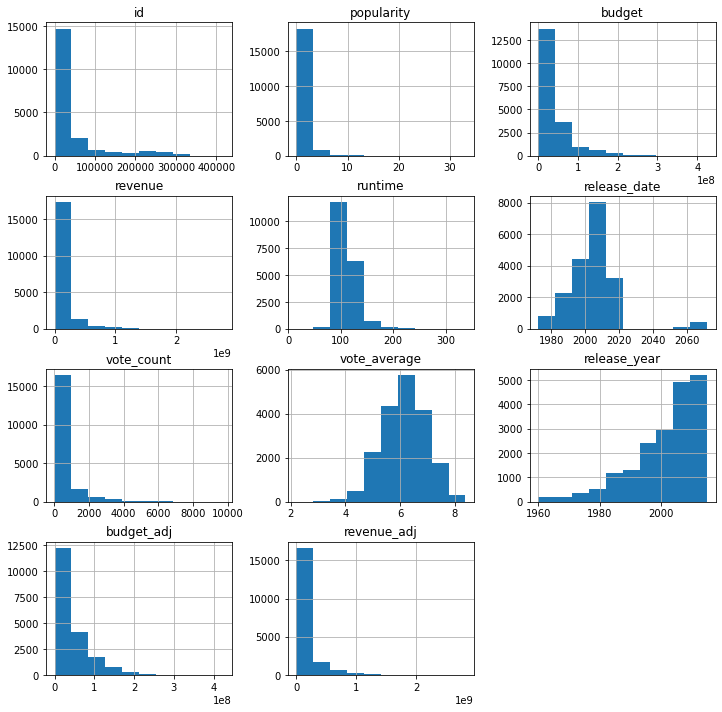

In [24]:
df_edit.hist(figsize=(12,12));

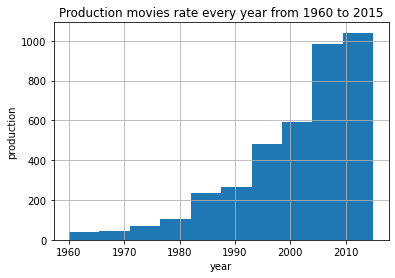

In [25]:
df.release_year.hist();
plt.xlabel('year')
plt.ylabel('production')
plt.title('Production movies rate every year from 1960 to 2015');

* We see that the production rate increases every year than the previous one

In [26]:
months_top=df.groupby(['month_name'])['profits'].mean()
months_top

month_name
Apr    5.974019e+07
Aug    4.074104e+07
Dec    9.198651e+07
Feb    4.056733e+07
Jan    3.051471e+07
Jul    9.356822e+07
Jun    1.266208e+08
Mar    6.559951e+07
May    1.187381e+08
Nov    9.983952e+07
Oct    4.730233e+07
Sep    2.934598e+07
Name: profits, dtype: float64

### Research Question 1 
### What is the highest profit that can be obtained in months?

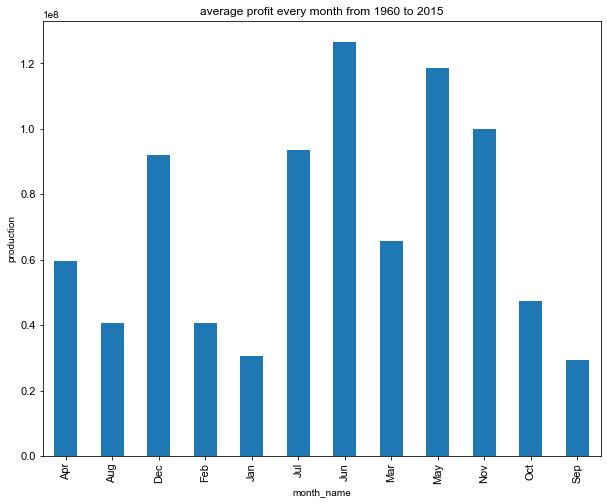

In [27]:
months_top.plot(kind='bar',figsize=(10,8),fontsize=11);
plt.xlabel('month_name')
plt.ylabel('production')
plt.title('average profit every month from 1960 to 2015');
sns.set_style("darkgrid")

* We see that the highest month of 'June' profit is from 1960 to 2015

### Research Question 2 
### What are the most popular genres of films according to vote average?

In [28]:
genre_08=df_edit.groupby(['genre'])['vote_average'].count()
genre_08

genre
Action             1085
Adventure           749
Animation           201
Comedy             1358
Crime               651
Documentary          35
Drama              1756
Family              425
Fantasy             396
Foreign              13
History             129
Horror              463
Music               136
Mystery             344
Romance             667
Science Fiction     519
TV Movie              1
Thriller           1204
War                 119
Western              52
Name: vote_average, dtype: int64

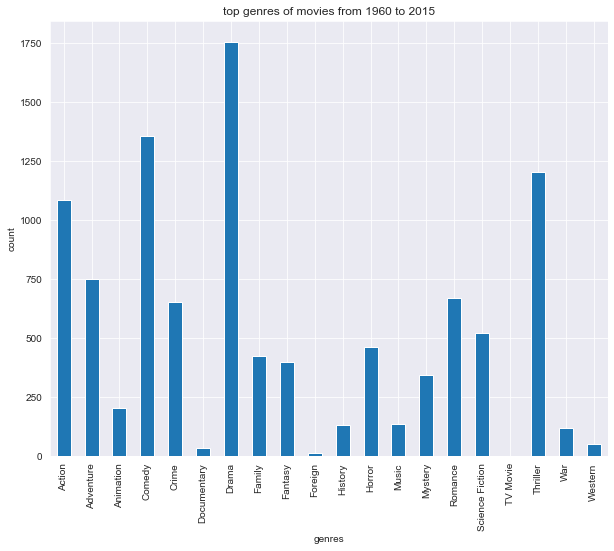

In [29]:
genre_08.plot(kind='bar',figsize=(10,8));
plt.xlabel('genres')
plt.ylabel('count')
plt.title('top genres of movies from 1960 to 2015');

* we see the highest genres movie is drama , Comedy , Thriller , Action             

### Research Question 4
### What are the most top 5 movies popular ?

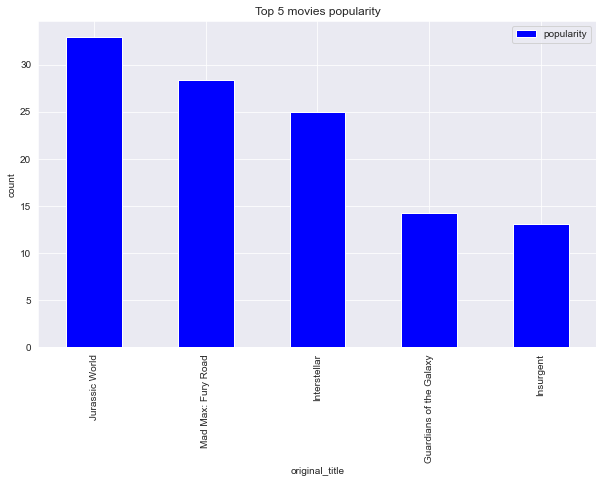

In [30]:
df.nlargest(5,'popularity').plot.bar(x = 'original_title', y= 'popularity', color= 'blue', title='Top 5 movies popularity',figsize=(10,6));
plt.ylabel('count');

* we see the top 3 movies popular is (jurassic world) , (mad max: fury road) , (interstellar) , (guardians of the galaxy) , (insurgent) in order

### Research Question 5 
### What are the top profits and genres movies between 1960 to 2015?

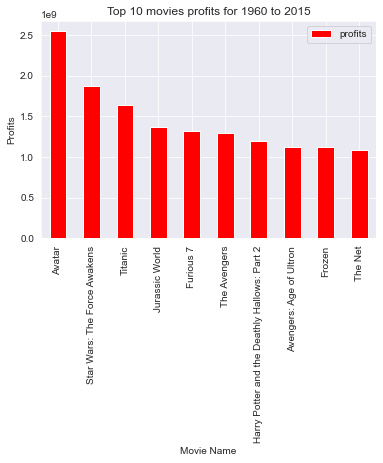

In [31]:
df.nlargest(10,'profits').plot.bar(x = 'original_title', y= 'profits', color= 'red', title='Top 10 movies profits for 1960 to 2015')
plt.xlabel('Movie Name')
plt.ylabel('Profits');

* We see that the best films are Avatar, then star wars: the force awakens ... as above

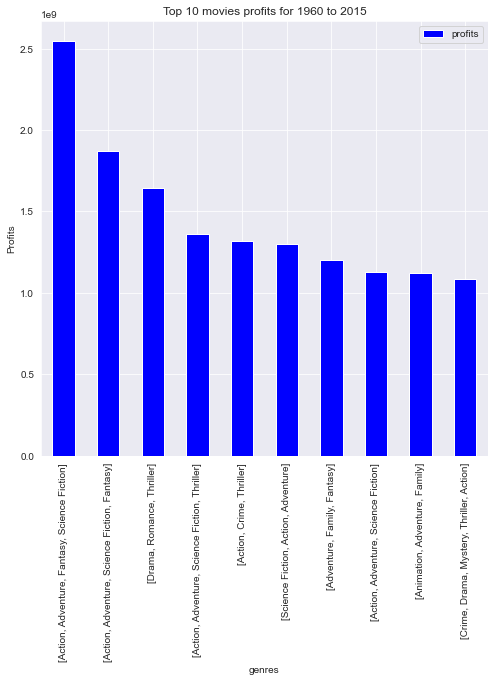

In [32]:
df.nlargest(10,'profits').plot.bar(x = 'genres', y= 'profits', color= 'blue', title='Top 10 movies profits for 1960 to 2015',figsize=(8,8));
plt.xlabel('genres')
plt.ylabel('Profits');

* We see that the best films are Avatar, then star wars: the force awakens and the genres of them is action , adventure and science fiction 

<a id='conclusions'></a>
## Conclusions
* We analyzed the movie data and then found the following is that the rate of movie production is increasing every year compared to the previous year. This is a great market for investors
* We also found that the best month to make profits is June then May. We also found that regular people vote for Drama, Comedy, Thriller, and Action
* We also found that the most popular films are not the most profit. For example, the most popular are: Jurassic World, Mad Max: Fury Road, Interstellar, but the most profit come on Avatar, then star wars: the force awakens then titanic 
### limitations
* We found, while examining the data, some missing data. We do not know whether it will affect our decisions or not 
